In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
# generating a synthetic dataset
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
y = [0] * 20 + [1] * 20

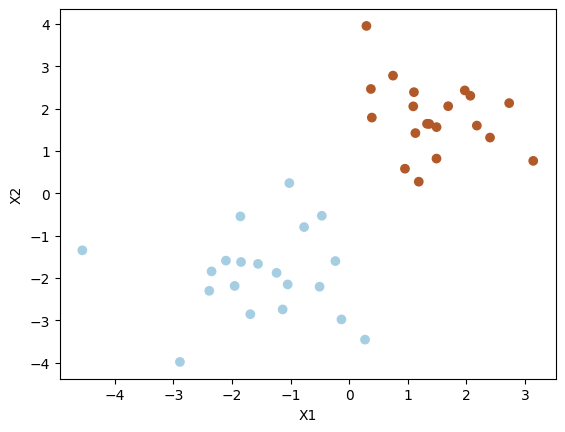

In [3]:
# visualising the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [4]:
# training the model
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

(250000, 2)


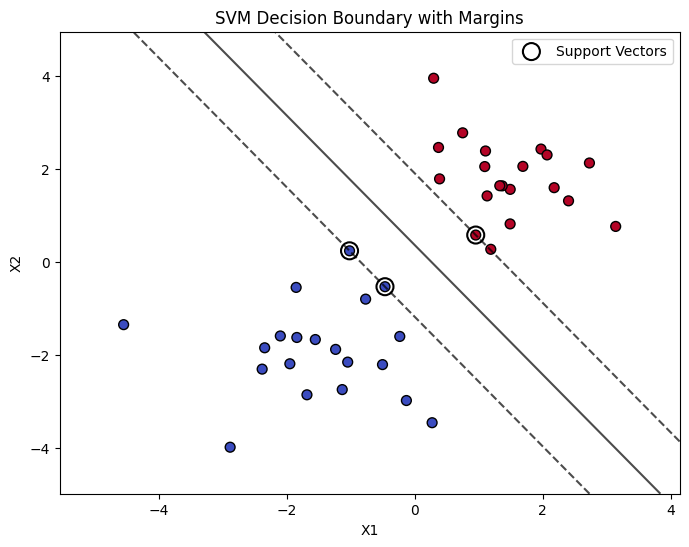

In [13]:
# Créer une grille fine pour tracer les contours
xx = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 500)
yy = np.linspace(X[:,1].min()-1, X[:,1].max()+1, 500)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

print(xy.shape)
# Affichage
plt.figure(figsize=(8,6))

# Frontière de décision et marges
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
            linestyles=['--','-','--'], alpha=0.7)

# Points d'entraînement
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='coolwarm', edgecolors='k')

# Vecteurs de support
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],
            s=150, facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Decision Boundary with Margins')
plt.legend()
plt.show()


In [6]:
# Make a prediction
np.random.seed(1)
X_test = np.random.randn(10, 2)
y_pred = clf.predict(X_test)

print("Predictions:", y_pred)

Predictions: [1 0 0 1 0 0 0 1 0 1]
